In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from IPython import display
display.clear_output()

from roboflow import Roboflow
rf = Roboflow(api_key="API-KEY")
project = rf.workspace("suni-intellekt-dmxfa").project("socar-tower-detection")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Socar-Tower-Detection-1 in yolov8:: 100%|██████████| 226/226 [00:00<00:00, 6831.51it/s]


In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=39 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.67 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Socar-Tower-Detection-1/data.yaml, epochs=39, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, v

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.7 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/datasets/Socar-Tower-Detection-1/test/images/msg2006424084-5324_jpg.rf.5c584a6ba62e12723ad4434c108102e6.jpg: 640x640 (no detections), 16.3ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/11 /content/datasets/Socar-Tower-Detection-1/test/images/msg2006424084-5330_jpg.rf.8ef98d7ecc6d848a74b7c89b9166bde2.jpg: 640x640 1 tower, 16.3ms
image 3/11 /content/datasets/Socar-Tower-Detection-1/test/images/msg2006424084-5334_jpg.rf.18897de2ef1b1f387aa6ded2095a230c.jpg: 640x640 1 tower, 16.3ms
image 4/11 /content/datasets/Socar-Tower-Detection-1/test/images/msg2006424084-5337_jpg.rf.e361d9e31e4ecf6247daf04af327a110.jpg: 640x640 1 tower, 16.3ms
image 5/11 /content/datasets/Socar-Tower-Detection-1/test/images/msg2006424084-5345_jpg.rf.732073f950d4933e54ee97077e0ab3cd.jpg: 640x640 1 tower, 16.2ms
image 

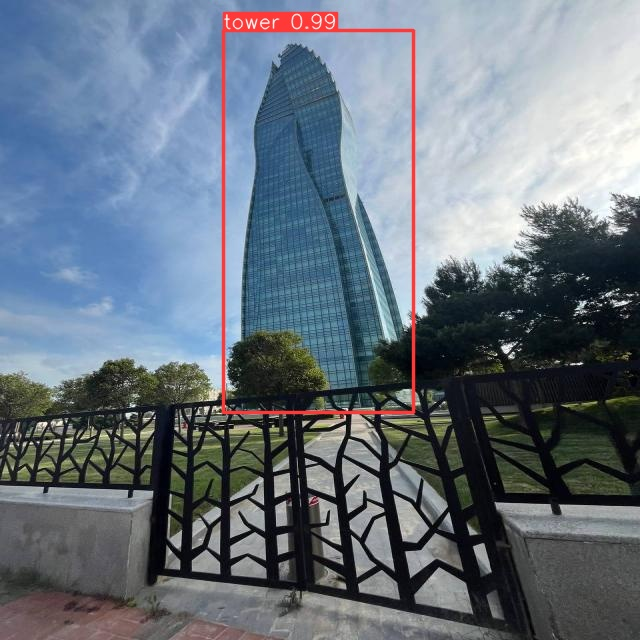

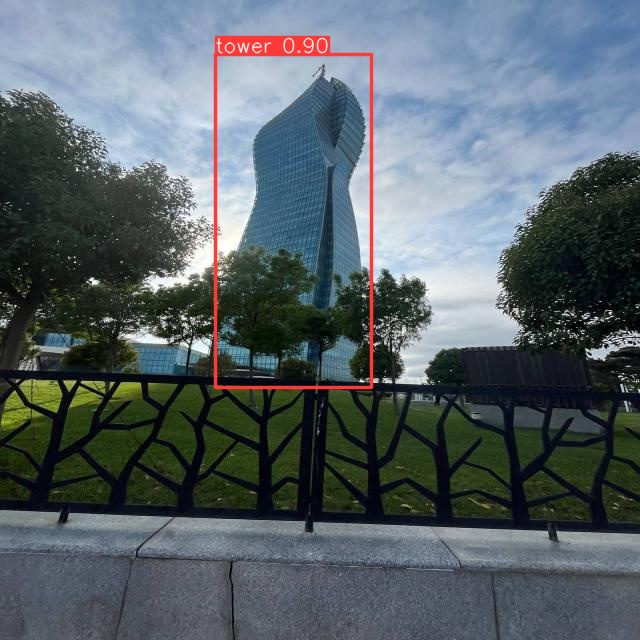

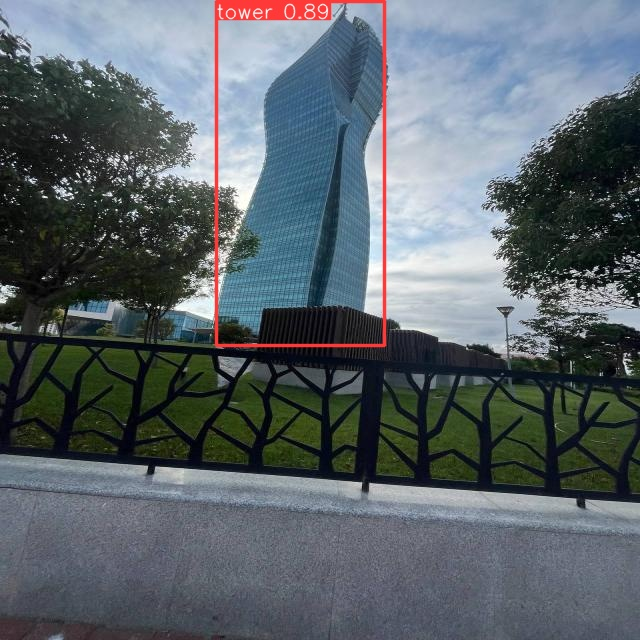

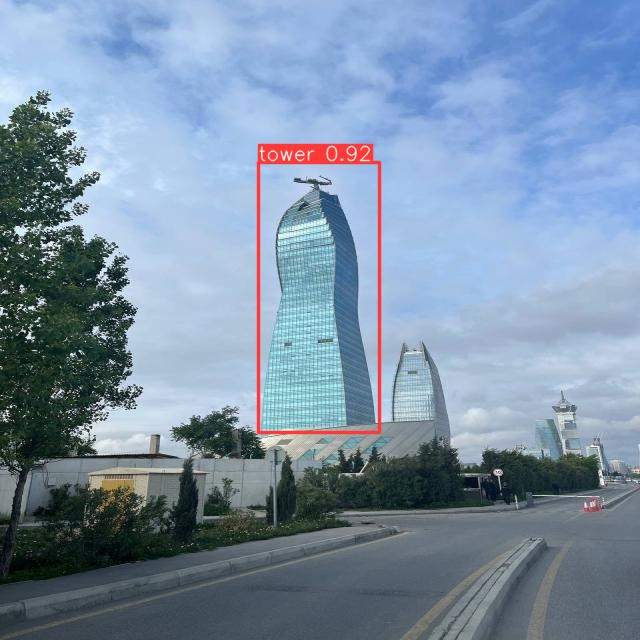

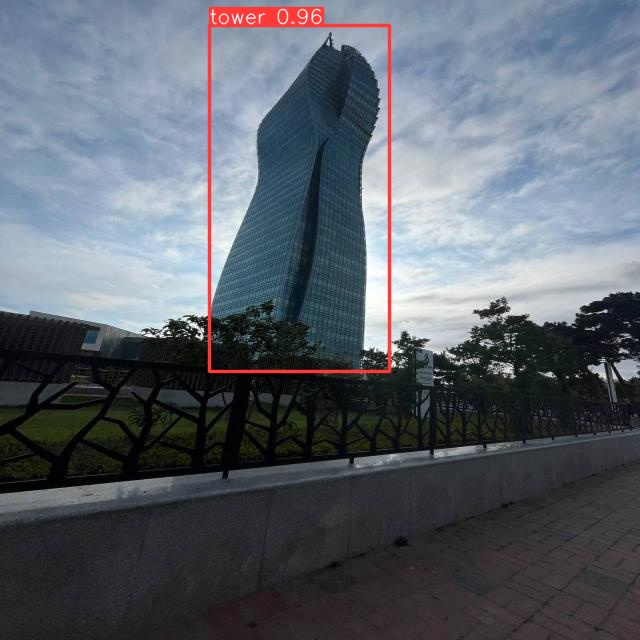

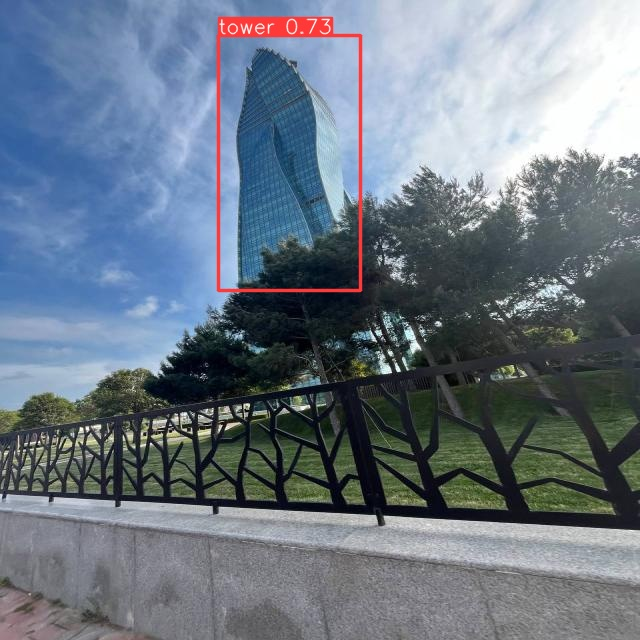

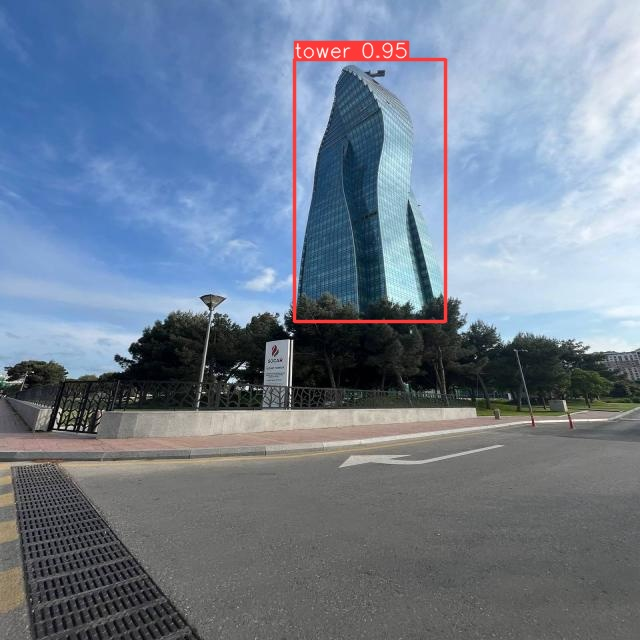

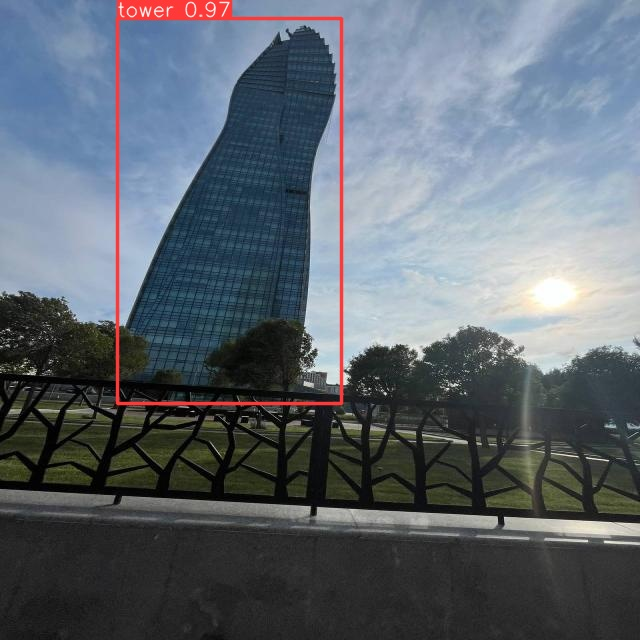

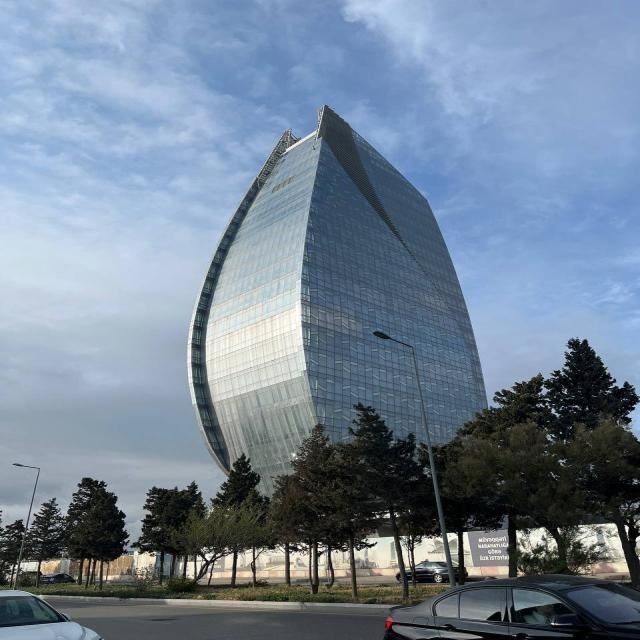

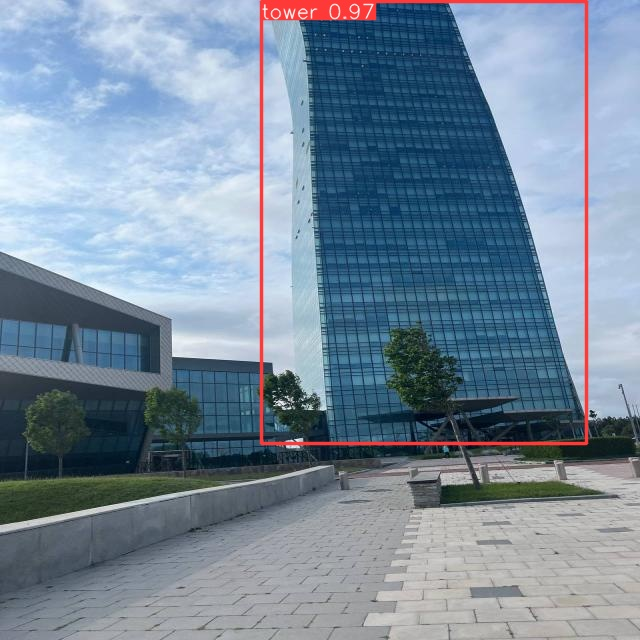

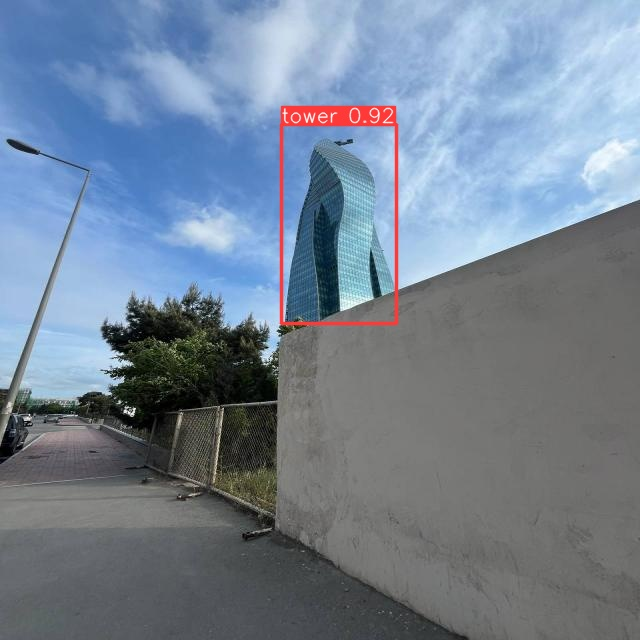

In [18]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg'):
      display(Image(filename=image_path, width=600))